In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

pundits = ["benshapiro", "MattWalshBlog", "RealCandaceO", "RubinReport"] # dict

# Creating list to append tweet data to
tweets_list1 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for n, k in enumerate(pundits):
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'from:{pundits[n]}').get_items()):  # f string nested for loop
     if i>3000:
            break
     tweets_list1.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
    
# Creating a dataframe from the tweets list above 
tweets_df1 = pd.DataFrame(tweets_list1, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

In [2]:
from urllib.parse import urlparse
#https://stackoverflow.com/a/52455972
def is_url(url):
  try:
    result = urlparse(url)
    return all([result.scheme, result.netloc])
  except ValueError:
    return False
# remove URLs
tweets_df1['Text'] = [' '.join(y for y in x.split() if not is_url(y)) for x in tweets_df1['Text']]
print (tweets_df1)

                       Datetime             Tweet Id  \
0     2022-07-11 13:11:44+00:00  1546482370873802752   
1     2022-07-11 13:07:16+00:00  1546481249321205760   
2     2022-07-11 13:06:34+00:00  1546481072271200258   
3     2022-07-10 12:03:42+00:00  1546102861674778625   
4     2022-07-10 01:22:09+00:00  1545941413199843333   
...                         ...                  ...   
11999 2021-10-06 22:53:47+00:00  1445885025572978689   
12000 2021-10-06 22:32:48+00:00  1445879744470290436   
12001 2021-10-06 20:35:10+00:00  1445850137704554499   
12002 2021-10-06 19:47:36+00:00  1445838168784195589   
12003 2021-10-06 19:40:22+00:00  1445836348884094983   

                                                    Text     Username  
0      According to the Dems and their media lapdogs,...   benshapiro  
1      This is why Pete Buttigieg trends for defendin...   benshapiro  
2      The reason Democrats are suddenly "realizing" ...   benshapiro  
3      I do seem to remember people lik

In [3]:


from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io

In [4]:
# drop empty cells
import numpy as np

tweets_df1['Text'].replace('', np.nan, inplace=True )

tweets_df1.dropna(subset=['Text'], inplace=True)

In [5]:
# lowercase all
text = tweets_df1['Text'].str.lower()

In [6]:
np.random.seed(12345)
np.random.choice(text,10)

array(['the other guests on the dr phil panel are complaining that i gave them nightmares',
       '🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸',
       'i am more than a little tired of being lectured about fairness by a career leech who is responsible for zero job creation and yet owns three houses.',
       "@galaxy_of_bears i'd be worried about it cracking from the direct flame",
       'crazy racist rant against @vanjones68 and @sagesteele on msnbc. i busted out my fake newsman glasses to help dissect.',
       'people are scandalized by this opinion but wait until they find out that i also think no fault divorce should be abolished',
       "@jeffzentner couldn't agree more",
       '“sometimes evil just stares you in the face and you gotta call it what it is.” 2',
       'the thinking here was clearly, "okay, this tux is incomplete, what if i just grab a tablecloth and staple it to my ass"',
       'when people try to tell me i don’t have influence, and then @harry_styles dedicates an entire post to my 

In [7]:
print('BEFORE:')
print(text[0])
text = text.map(lambda s: ' '.join([x for x in s.split() if 'http' not in x]))
print('AFTER:')
print(text[0])


BEFORE:
according to the dems and their media lapdogs, if you say that a trans woman is a biological male, this amounts to violence. if you track down a scotus justice who was nearly assassinated a month ago and harass him at a restaurant with his families, this is free speech.
AFTER:
according to the dems and their media lapdogs, if you say that a trans woman is a biological male, this amounts to violence. if you track down a scotus justice who was nearly assassinated a month ago and harass him at a restaurant with his families, this is free speech.


max tweet length: 350
min tweet len: <bound method NDFrame._add_numeric_operations.<locals>.min of 0        270
1        222
2        196
3         97
4        125
        ... 
11998      5
11999     14
12001    141
12002     63
12003     34
Name: Text, Length: 11805, dtype: int64>


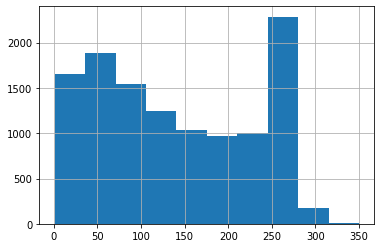

In [8]:
import matplotlib
print('max tweet length:', text.map(len).max())
print('min tweet len:', text.map(len).min)
text.map(len).hist();

In [9]:
# use tweets only over 50 characters

text = text[text.map(len)>50]
len(text)

9380

In [10]:
# get chars dictionary

chars = sorted(list(set(''.join(text))))
print("total char:", len(chars))

char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

total char: 208


In [11]:
chars

[' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '=',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '|',
 '~',
 '¯',
 'à',
 'é',
 'í',
 'ñ',
 '÷',
 'ú',
 '֔',
 '֙',
 '֤',
 'ְ',
 'ֲ',
 'ִ',
 'ֵ',
 'ֶ',
 'ַ',
 'ָ',
 'ֹ',
 'ּ',
 '־',
 'ׁ',
 'א',
 'ב',
 'ד',
 'ה',
 'ו',
 'ח',
 'י',
 'ך',
 'כ',
 'ל',
 'ם',
 'מ',
 'נ',
 'ע',
 'צ',
 'ק',
 'ר',
 'ש',
 'ת',
 '\u200d',
 '–',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '…',
 '\u2066',
 '\u2069',
 '™',
 '⅓',
 '♀',
 '✓',
 '✔',
 '❌',
 '❤',
 '⬜',
 'ツ',
 'ー',
 '광',
 '구',
 '국',
 '내',
 '니',
 '다',
 '말',
 '서',
 '수',
 '습',
 '에',
 '영',
 '을',
 '이',
 '입',
 '있',
 '정',
 '제',
 '책',
 '한',
 '할',
 '️',
 '🇦',
 '🇧',
 '🇨',
 '🇬',
 '🇮',
 '🇱',
 '🇳',
 '🇸',
 '🇹',
 '🇺',
 '🇿',
 '🍌',
 '🍎',
 '🎵',
 '🏴',
 '🐉',
 '🐊',
 '🐍',


In [13]:
for c in chars[62:]:
    print('\nCHAR:', c)
    smple = [x for x in text if c in x]
    print(random.sample(smple, min(3, len(smple))))


CHAR: |
['a triumphant moment for all of us virginians | ep. 831', 'gay superman defeats climate change and racism | ep. 817', 'media shocked to discover that children need fathers | ep. 825']

CHAR: ~
["that's a big reason why 9 of the 10 best states for unemployment are red, and ~17 of the top 20. and it's why all nine+dc of the worst are blue.", 'if lbgtq+-~%^&amp; advocates insist on this polarity, this is not going to go well for them', '"so, whilst it is in human nature to engage in conversation with others, to be friendly, unfortunately, this is not the time to do that." new south wales has an average of ~300 cases per day and 2 deaths; population is 8 million.']

CHAR: ¯
["trump: the election was stolen! media: that's undermining democracy! biden: every single election in a republican state will be stolen if you don't pass this bill that's not going to pass! media: ¯\\_(ツ)_/¯"]

CHAR: à
['i too remember the stories of robespierre eating cake with marie antoinette while wearing

In [14]:
# remove characters

import re
for c in chars[62:]:
    text = text.str.replace(c,'')

/var/folders/2_/dkxg0fq56mv06fxh6723qjn00000gn/T/ipykernel_7755/3326390067.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  text = text.str.replace(c,'')


In [15]:
# get chars dictionary

chars = sorted(list(set(''.join(text))))
print("total char:", len(chars))

char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

total char: 62
